# Importing libraries

In [18]:
import numpy as numpy
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

# Importing dataset



In [19]:
dataframe = pd.read_csv('processed_reviews_split_surnamesR_minimal.csv')

In [20]:
dataframe.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,I am one of those people who had Gran Turismo ...,False,1.0,video_games
1,product_review_000001,This game is awful for several reasons.\n1. T...,False,1.0,video_games
2,product_review_000002,This case is great for travel with the 3Ds or ...,False,5.0,video_games
3,product_review_000003,My go-to mic cable for quite a few years now. ...,True,5.0,musical_instruments
4,product_review_000004,The left one falls fairly frequently even when...,True,4.0,video_games


In [21]:
dataframe.describe()

,review_score
count,32917.000000
mean,4.090440
std,1.434135
min,-1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Checking duplicates for removing them

In [22]:
dataframe.drop_duplicates(inplace=True)

# Checking for null values

In [23]:
dataframe.isnull()

,review_id,text,verified,review_score,product_category
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
32912,False,False,False,False,False
32913,False,False,False,False,False
32914,False,False,False,False,False
32915,False,False,False,False,False


In [24]:
dataframe.isnull().sum()

review_id             0
text                  9
verified            106
review_score          0
product_category    906
dtype: int64

# Dropping null values

In [25]:
dataframe = dataframe.dropna()

In [26]:
dataframe.shape

(31898, 5)

In [27]:
dataframe.isnull().sum()

review_id           0
text                0
verified            0
review_score        0
product_category    0
dtype: int64

In [28]:
dataframe.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,I am one of those people who had Gran Turismo ...,False,1.0,video_games
1,product_review_000001,This game is awful for several reasons.\n1. T...,False,1.0,video_games
2,product_review_000002,This case is great for travel with the 3Ds or ...,False,5.0,video_games
3,product_review_000003,My go-to mic cable for quite a few years now. ...,True,5.0,musical_instruments
4,product_review_000004,The left one falls fairly frequently even when...,True,4.0,video_games


# Downloading stopword package

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
def text_process(text):
  no_punc = [char for char in text if char not in string.punctuation]
  no_punc = ''.join(no_punc)

  clean_words = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
  return clean_words 

In [31]:
dataframe['text'].head().apply(text_process)

0    [one, people, Gran, Turismo, 1, 2, 3, 4, speci...
1    [game, awful, several, reasons, 1, controls, a...
2    [case, great, travel, 3Ds, DS, Lite, holds, 12...
3    [goto, mic, cable, quite, years, Spiral, shiel...
4    [left, one, falls, fairly, frequently, even, g...
Name: text, dtype: object

# Splitting the dataset

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
text_bow = CountVectorizer(analyzer=text_process).fit_transform(dataframe['text']) 

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(text_bow, dataframe['review_score'], test_size=0.33, random_state=0)

In [35]:
text_bow.shape

(31898, 84270)

# Developing classification models using Multinomial Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, Y_train)


In [37]:
print(clf.predict(X_train))
print(Y_train.values)

[5. 5. 5. ... 5. 5. 5.]
[5. 5. 4. ... 5. 2. 5.]


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = clf.predict(X_test)
print(classification_report(Y_test, pred))
print()
print('Confusion matrix: \n', confusion_matrix(Y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.02      0.00      0.01       305
         1.0       0.61      0.14      0.22       567
         2.0       0.32      0.01      0.02       518
         3.0       0.35      0.05      0.09       996
         4.0       0.29      0.19      0.23      1955
         5.0       0.65      0.93      0.76      6186

    accuracy                           0.60     10527
   macro avg       0.37      0.22      0.22     10527
weighted avg       0.52      0.60      0.51     10527


Confusion matrix: 
 [[   1    6    0    6   33  259]
 [   0   77    7   21  101  361]
 [   1   11    6   35  141  324]
 [   2    6    1   51  297  639]
 [   4    4    2   15  365 1565]
 [  34   23    3   19  333 5774]]


In [39]:
print('Accuracy: ', accuracy_score(Y_test, pred))

Accuracy:  0.5959912605680631


#  Decision tree Classifier Algorithm

In [40]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, Y_train)

In [41]:
print(tree.predict(X_train))

[5. 5. 4. ... 5. 2. 5.]


In [42]:
pred_dt = tree.predict(X_test)
print(classification_report(Y_test, pred_dt))
print()
print('Confusion matrix: \n', confusion_matrix(Y_test, pred_dt))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       305
         1.0       0.27      0.25      0.26       567
         2.0       0.20      0.13      0.16       518
         3.0       0.23      0.21      0.22       996
         4.0       0.29      0.29      0.29      1955
         5.0       0.69      0.72      0.70      6186

    accuracy                           0.52     10527
   macro avg       0.28      0.27      0.27     10527
weighted avg       0.51      0.52      0.51     10527


Confusion matrix: 
 [[   1   13    9   34   65  183]
 [  17  144   54   69   81  202]
 [  21   67   67   76   94  193]
 [  33   63   45  208  231  416]
 [  93   60   60  180  560 1002]
 [ 228  181  100  322  908 4447]]


In [43]:
print('Accuracy: ', accuracy_score(Y_test, pred_dt))

Accuracy:  0.5155314904531205


# Generating dummy variables 

In [46]:
dataframe_new = pd.get_dummies(dataframe, columns=['product_category'])
dataframe_new.head()

,review_id,text,verified,review_score,product_category_musical_instruments,product_category_video_games
0,product_review_000000,I am one of those people who had Gran Turismo ...,False,1.0,0,1
1,product_review_000001,This game is awful for several reasons.\n1. T...,False,1.0,0,1
2,product_review_000002,This case is great for travel with the 3Ds or ...,False,5.0,0,1
3,product_review_000003,My go-to mic cable for quite a few years now. ...,True,5.0,1,0
4,product_review_000004,The left one falls fairly frequently even when...,True,4.0,0,1


In [47]:
dataframe_new= dataframe_new.drop(['product_category_video_games'], axis = 1)

In [48]:
dataframe_new

,review_id,text,verified,review_score,product_category_musical_instruments
0,product_review_000000,I am one of those people who had Gran Turismo ...,False,1.0,0
1,product_review_000001,This game is awful for several reasons.\n1. T...,False,1.0,0
2,product_review_000002,This case is great for travel with the 3Ds or ...,False,5.0,0
3,product_review_000003,My go-to mic cable for quite a few years now. ...,True,5.0,1
4,product_review_000004,The left one falls fairly frequently even when...,True,4.0,0
...,...,...,...,...,...
32912,product_review_032912,"Well, when we look at this game, we are faced ...",False,2.0,0
32913,product_review_032913,This is an awesome game. It is a must buy. It ...,False,5.0,0
32914,product_review_032914,I had purchased a 3 inch pop filter for my Hei...,True,5.0,1
32915,product_review_032915,I couldn't get into this game. I would sugges...,True,2.0,0


In [51]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(text_bow, dataframe_new['product_category_musical_instruments'], test_size=0.33, random_state=0)

In [52]:
clf2 = MultinomialNB().fit(X_train2, y_train2)


In [53]:
print(clf.predict(X_train2))

[5. 5. 5. ... 5. 5. 5.]


In [54]:
print(y_train2.values)

[1 0 0 ... 1 0 1]


# Multinomial Naive Bayes

In [58]:
pred2 = clf2.predict(X_test)
print(classification_report(y_test2, pred2))
print()
print('Confusion matrix: \n', confusion_matrix(Y_test, pred2))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7051
           1       0.85      0.94      0.90      3476

    accuracy                           0.93     10527
   macro avg       0.91      0.93      0.92     10527
weighted avg       0.93      0.93      0.93     10527


Confusion matrix: 
 [[   0  191  114    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0  430  137    0    0    0    0]
 [   0  398  120    0    0    0    0]
 [   0  714  282    0    0    0    0]
 [   0 1297  658    0    0    0    0]
 [   0 3643 2543    0    0    0    0]]


In [56]:
print('Accuracy: ', accuracy_score(y_test2, pred2))

Accuracy:  0.9274247173933694


# Plotting of scatter plot

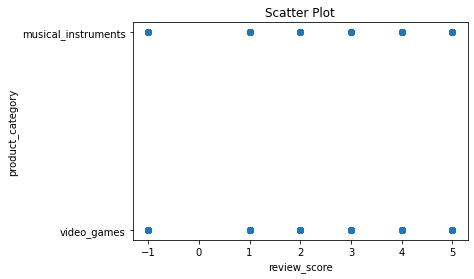

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(dataframe['review_score'], dataframe['product_category'])
plt.title("Scatter Plot")
plt.xlabel('review_score')
plt.ylabel('product_category')
  
plt.show()